In [10]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

# Inputs

In [11]:
input_dir = './Inputs_Assessment_Task_3_Laboratory_Report/'
output_dir = './Outputs_Assessment_Task_3_Laboratory_Report/'

print(
    input_dir,
    output_dir,
    sep='\n'
    )

./Inputs_Assessment_Task_3_Laboratory_Report/
./Outputs_Assessment_Task_3_Laboratory_Report/


# create output directory

In [12]:
def create_output_dir(arg_output_dir):
    """create output directory if it does not exist

    arguments:
        [string] --> arg_output_dir = path of the output directory name
    """
    if not os.path.exists(arg_output_dir):
        os.makedirs(arg_output_dir)

In [13]:
create_output_dir(output_dir)
output_dir

'./Outputs_Assessment_Task_3_Laboratory_Report/'

# Bernoulli apparatus properties

In [14]:
dist = pd.Series(data=[0, 0.06028, 0.06868, 0.07318, 0.08108, 0.14154],name='dist')
area = pd.Series(data=[0.00049, 0.00015, 0.00011, 0.00009, 0.000079, 0.00049], name='area')
bernoulli_aparatus = pd.concat([dist, area], axis=1)
bernoulli_aparatus

,dist,area
0,0.00000,0.000490
1,0.06028,0.000150
2,0.06868,0.000110
3,0.07318,0.000090
4,0.08108,0.000079
5,0.14154,0.000490


# read files

In [15]:
def list_files(arg_directory_path, arg_regex, arg_column_name='file_path'):
    """return list of files in a directory

    arguments:
        [string] --> arg_directory_path = directory path of the polygons
        [string] --> arg_regex = regex entry
        [string] --> arg_column_name = column's name
    """
    list_files = glob.glob(pathname=arg_directory_path + arg_regex)
    list_files = pd.DataFrame(list_files, columns=[arg_column_name])
    list_files.sort_values(by=[arg_column_name], inplace=True)
    list_files.reset_index(drop=True, inplace=True)

    return list_files

In [16]:
measurements = list_files(input_dir, 'bernoulli*.csv', 'file_path')
measurements['file_name'] = measurements.file_path. str.split(pat='/').str[-1]
measurements

,file_path,file_name
0,./Inputs_Assessment_Task_3_Laboratory_Report/b...,bernoulli_01_01.csv
1,./Inputs_Assessment_Task_3_Laboratory_Report/b...,bernoulli_01_02.csv
2,./Inputs_Assessment_Task_3_Laboratory_Report/b...,bernoulli_01_03.csv
3,./Inputs_Assessment_Task_3_Laboratory_Report/b...,bernoulli_02_01.csv
4,./Inputs_Assessment_Task_3_Laboratory_Report/b...,bernoulli_02_02.csv
5,./Inputs_Assessment_Task_3_Laboratory_Report/b...,bernoulli_02_03.csv
6,./Inputs_Assessment_Task_3_Laboratory_Report/b...,bernoulli__30_03_24__new__01.csv
7,./Inputs_Assessment_Task_3_Laboratory_Report/b...,bernoulli__30_03_24__new__02.csv
8,./Inputs_Assessment_Task_3_Laboratory_Report/b...,bernoulli__30_03_24__new__03.csv
9,./Inputs_Assessment_Task_3_Laboratory_Report/b...,bernoulli__30_03_24__new__04.csv


# Calculation and graphs

In [17]:
def calculations(arg_file_path, arg_file_name, arg_output_dir=output_dir, arg_dist=dist, arg_area=area):

    # raw data
    test = pd.read_csv(filepath_or_buffer=arg_file_path)
    print('='*20, arg_file_name, '-'*10, 'raw data', '-'*10, test, '\n', sep='\n')

    # SI units
    test['dist'] = arg_dist
    test['area'] = arg_area
    test['flow_rate'] = (test.volume/1000000)/test.time
    test['velocity'] = test.flow_rate/test.area
    test['pressure_head'] = test.static_head/1000
    test['velocity_head'] = (test.velocity**2)/(2*9.81)
    test['calculated_total_head'] = test.pressure_head + test.velocity_head
    test['measured_total_head'] = test.total_head/1000
    test = test[test.columns[[0,5,6,7,8,9,10,11,12]]]
    test.to_csv(path_or_buf='{}SI_units_{}'.format(arg_output_dir, arg_file_name), index=False)
    print('='*20, arg_file_name, '-'*10, 'SI units data', '-'*10, test, '\n', sep='\n')

    # plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(
        test.dist.to_numpy(),
        test.pressure_head.to_numpy(),
        '-o',
        label='pressure head'
        )
    ax.plot(
        test.dist.to_numpy(),
        test.velocity_head.to_numpy(),
        '-o',
        label='velocity head'
        )
    ax.plot(
        test.dist.to_numpy(),
        test.calculated_total_head.to_numpy(),
        '-o',
        label='calculated total head'
        )
    ax.plot(
        test.dist.to_numpy(),
        test.measured_total_head.to_numpy(),
        '-o',
        label='measured total head'
        )
    
    ax.legend()
    ax.grid(visible=True, which='both')
    ax.set_title(label='Pressure vs Distance\n{}'.format(arg_file_name.split(sep='.')[0]))
    ax.set_xlabel(xlabel='Distance in ($m$)')
    ax.set_ylabel(ylabel='Pressure in height ($m$)')
    fig.savefig(fname='{}Plot_{}.png'.format(arg_output_dir, arg_file_name.split(sep='.')[0]))

bernoulli_01_01.csv
----------
raw data
----------
   test_section  volume   time  static_head  total_head
0             1    1600  10.05          273         283
1             2    1600  10.05          220         274
2             3    1600  10.05          169         272
3             4    1600  10.05          117         264
4             5    1600  10.05           51         259
5             6    1600  10.05          132         160


bernoulli_01_01.csv
----------
SI units data
----------
   test_section     dist      area  flow_rate  velocity  pressure_head  \
0             1  0.00000  0.000490   0.000159  0.324906          0.273   
1             2  0.06028  0.000150   0.000159  1.061360          0.220   
2             3  0.06868  0.000110   0.000159  1.447309          0.169   
3             4  0.07318  0.000090   0.000159  1.768933          0.117   
4             5  0.08108  0.000079   0.000159  2.015240          0.051   
5             6  0.14154  0.000490   0.000159  0.324906

bernoulli_01_02.csv
----------
raw data
----------
   test_section  volume   time  static_head  total_head
0             1    1400  10.63          244         252
1             2    1400  10.63          209         245
2             3    1400  10.63          174         245
3             4    1400  10.63          138         242
4             5    1400  10.63           95         240
5             6    1400  10.63          147         170


bernoulli_01_02.csv
----------
SI units data
----------
   test_section     dist      area  flow_rate  velocity  pressure_head  \
0             1  0.00000  0.000490   0.000132  0.268781          0.244   
1             2  0.06028  0.000150   0.000132  0.878018          0.209   
2             3  0.06868  0.000110   0.000132  1.197298          0.174   
3             4  0.07318  0.000090   0.000132  1.463364          0.138   
4             5  0.08108  0.000079   0.000132  1.667123          0.095   
5             6  0.14154  0.000490   0.000132  0.268781

/tmp/ipykernel_14425/1939735586.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10,6))


bernoulli__30_03_24__old__03.csv
----------
raw data
----------
   test_section  volume   time  static_head  total_head
0             1    1520  10.07          260         259
1             2    1520  10.07          214         259
2             3    1520  10.07          168         258
3             4    1520  10.07          123         258
4             5    1520  10.07           62         256
5             6    1520  10.07          135         159


bernoulli__30_03_24__old__03.csv
----------
SI units data
----------
   test_section     dist      area  flow_rate  velocity  pressure_head  \
0             1  0.00000  0.000490   0.000151  0.308048          0.260   
1             2  0.06028  0.000150   0.000151  1.006289          0.214   
2             3  0.06868  0.000110   0.000151  1.372213          0.168   
3             4  0.07318  0.000090   0.000151  1.677149          0.123   
4             5  0.08108  0.000079   0.000151  1.910676          0.062   
5             6  0.14154  0.0

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
dtype: object

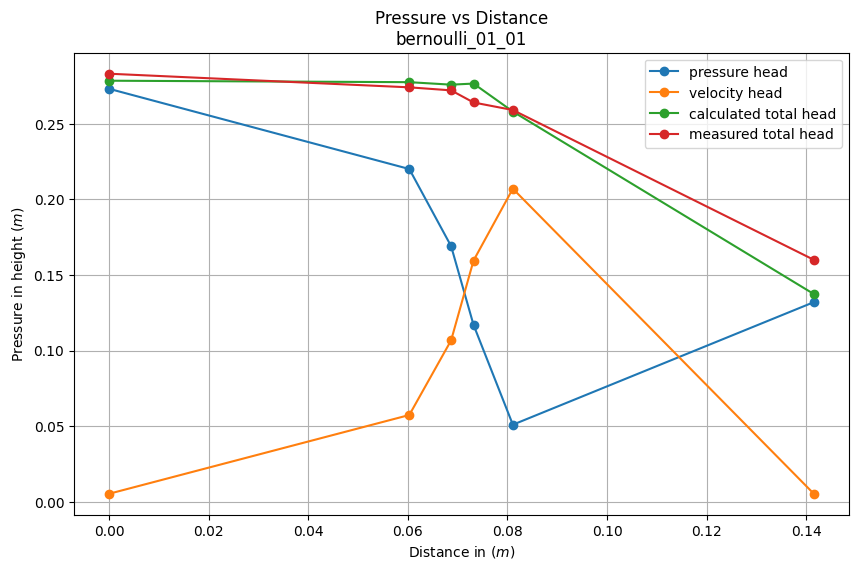

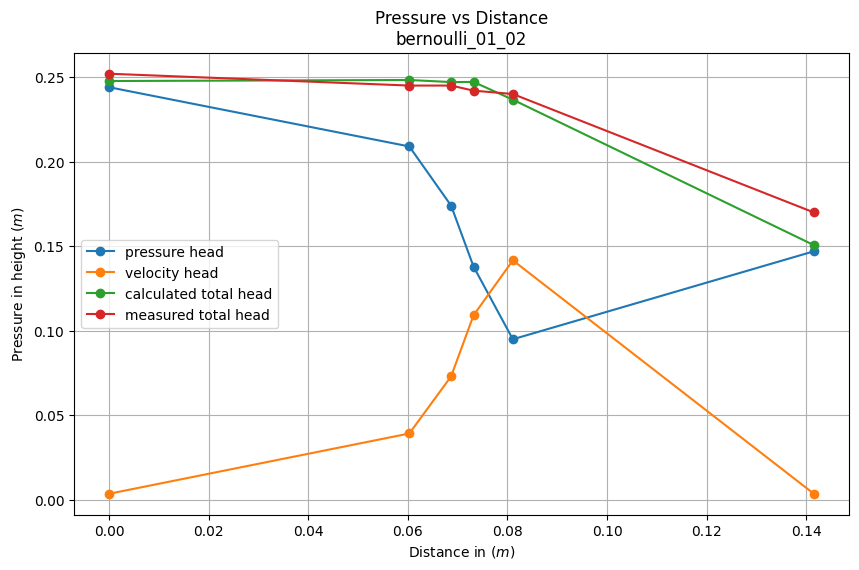

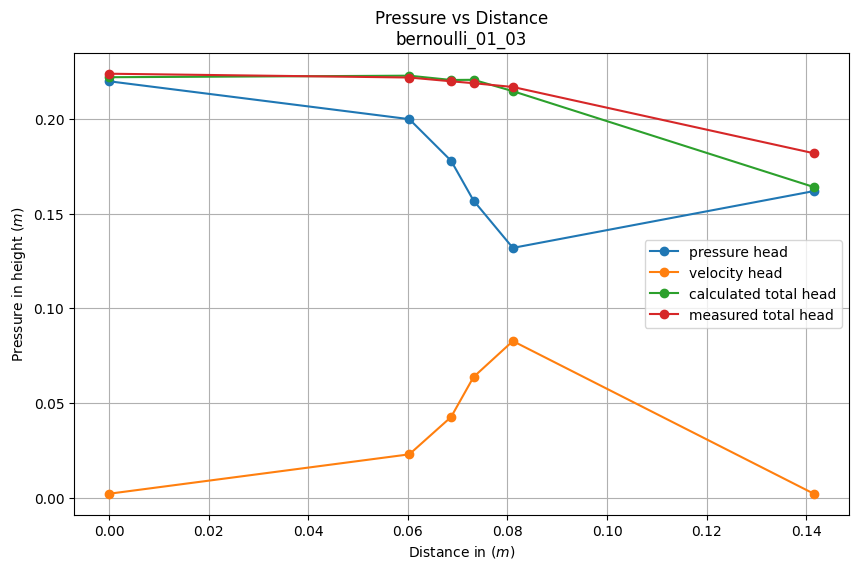

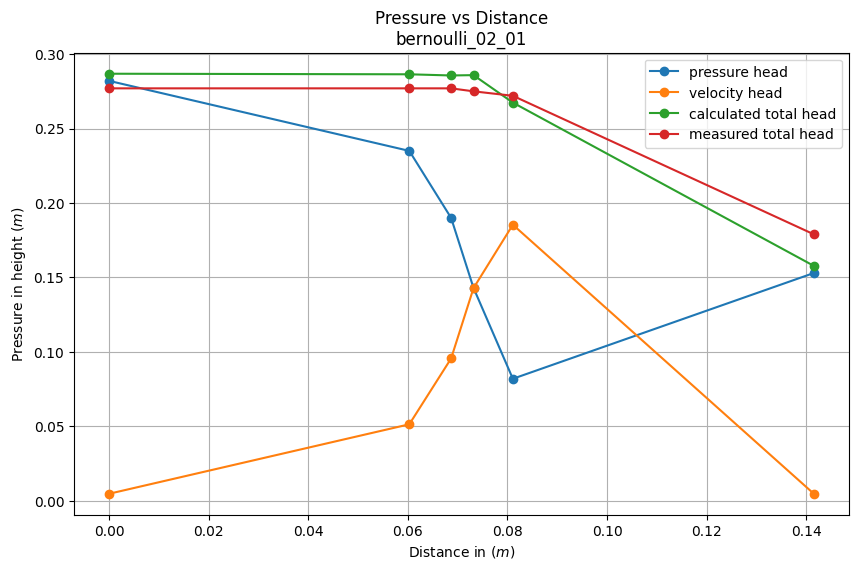

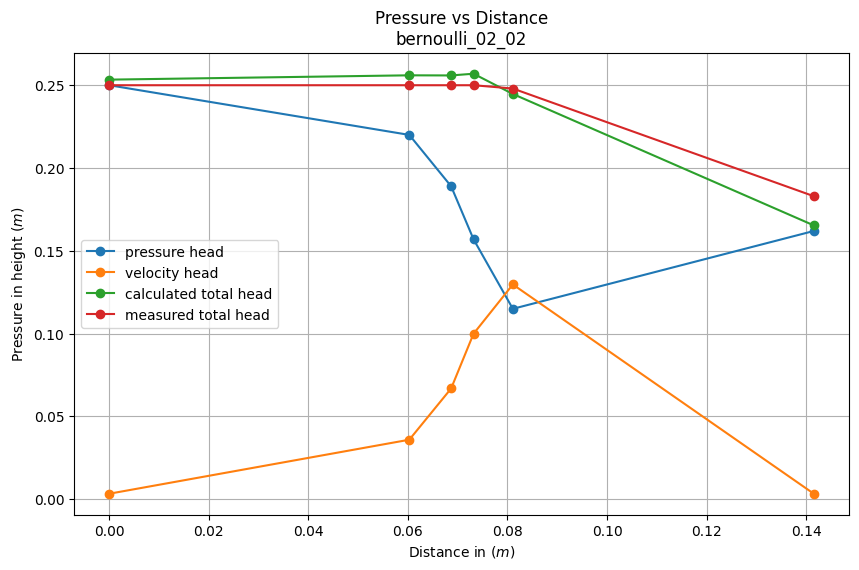

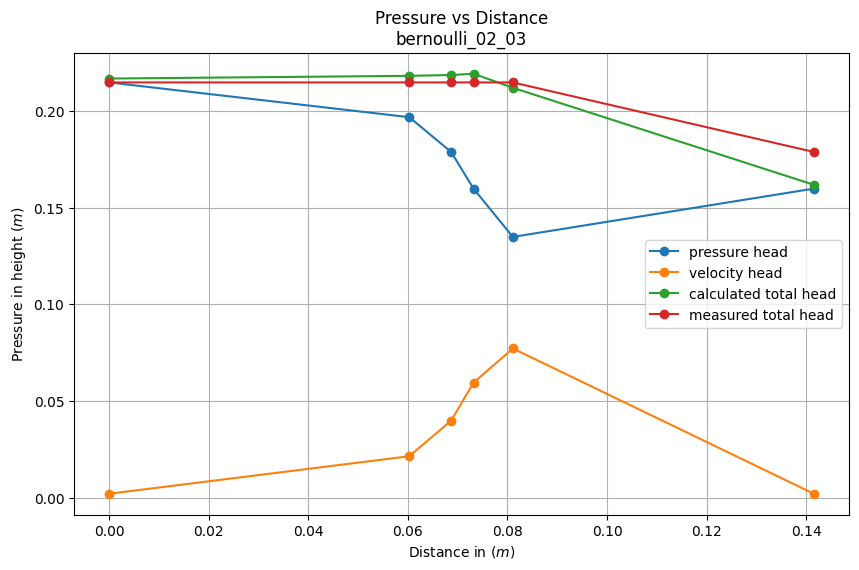

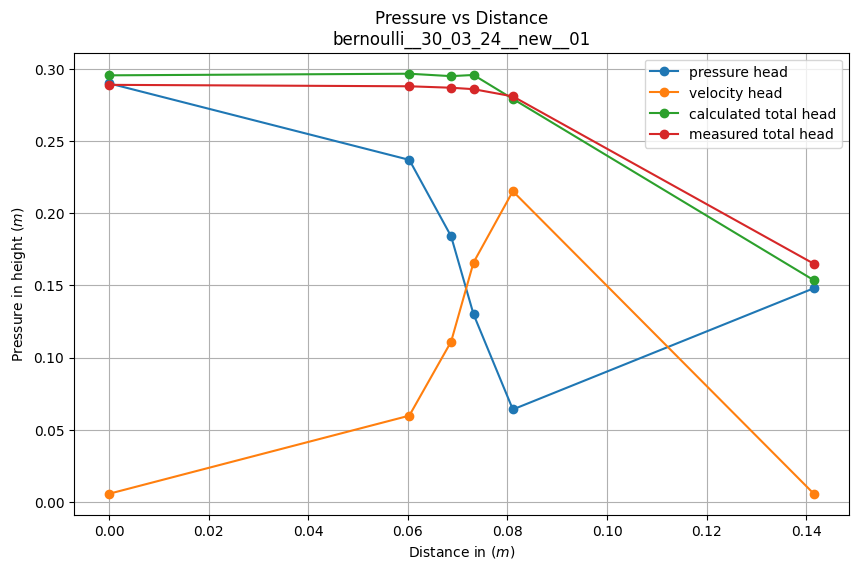

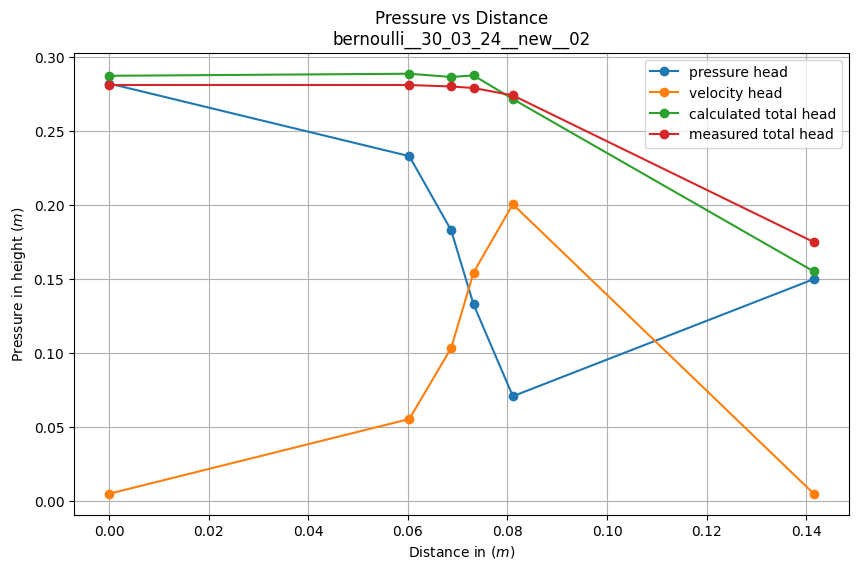

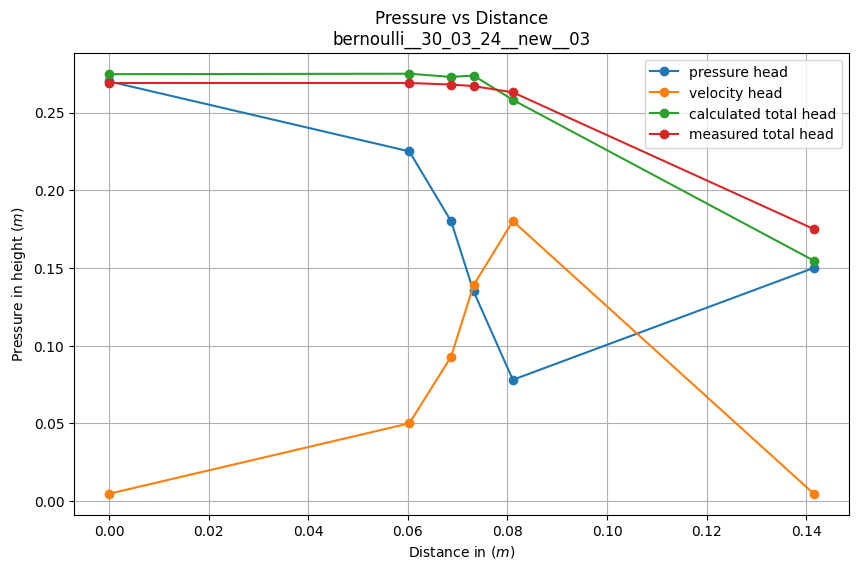

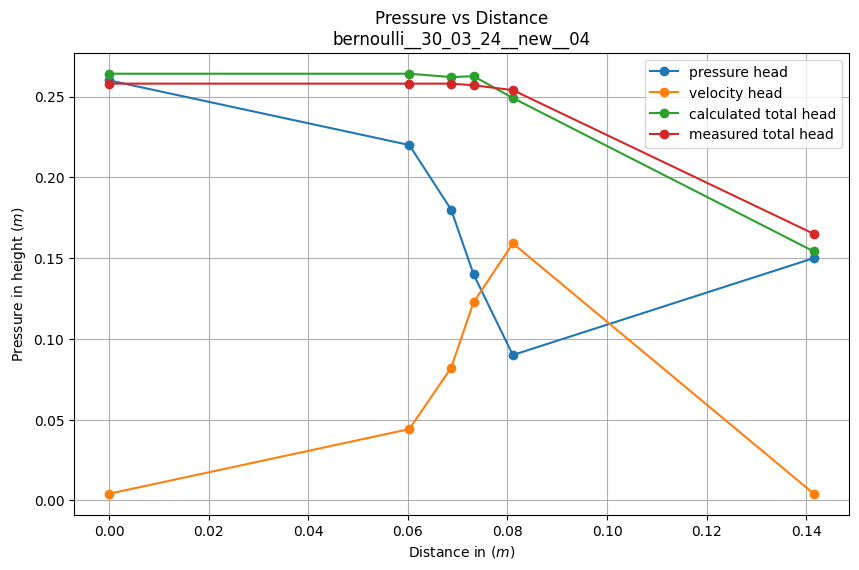

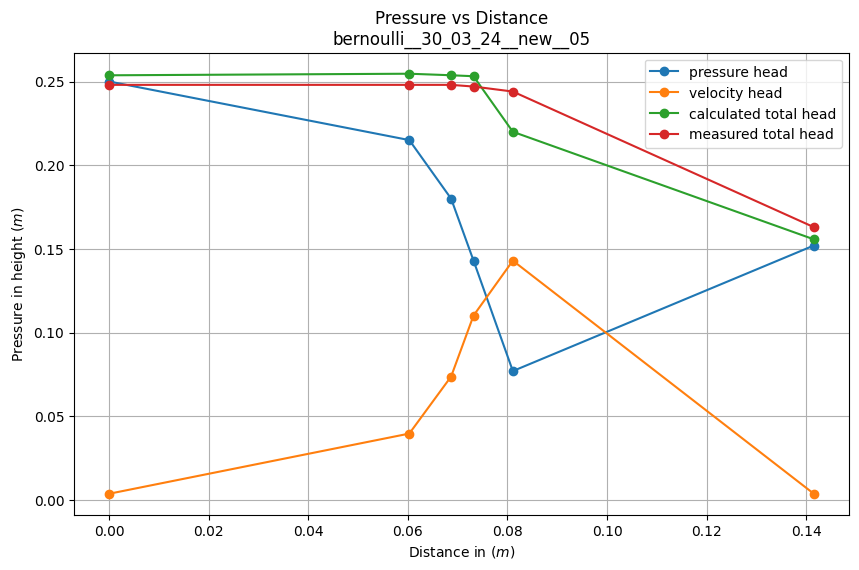

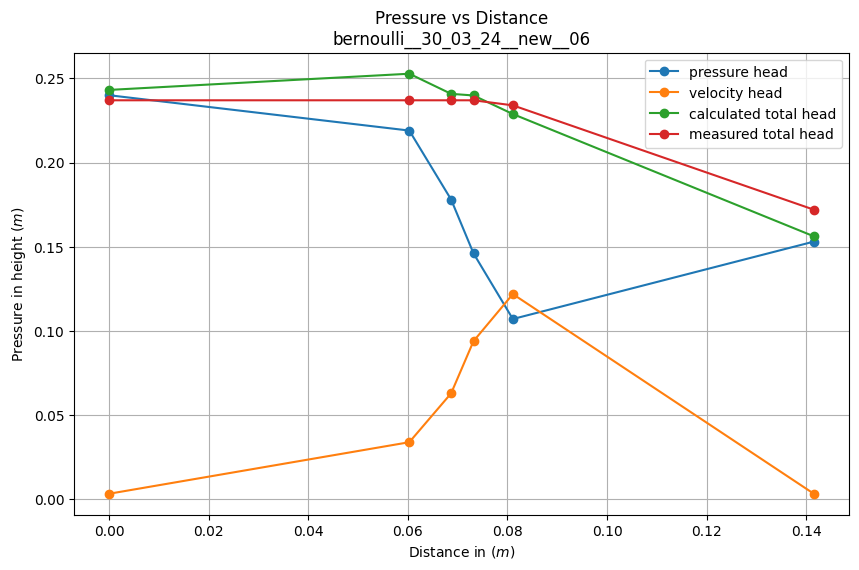

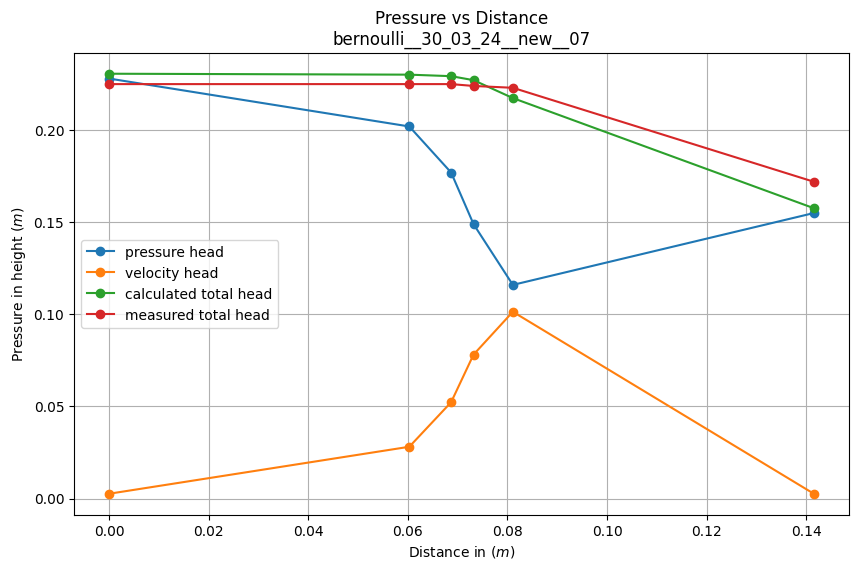

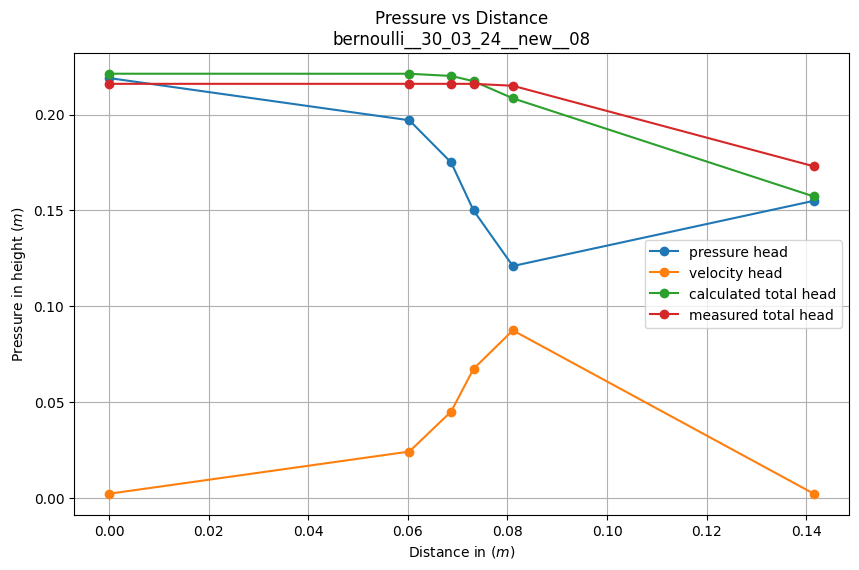

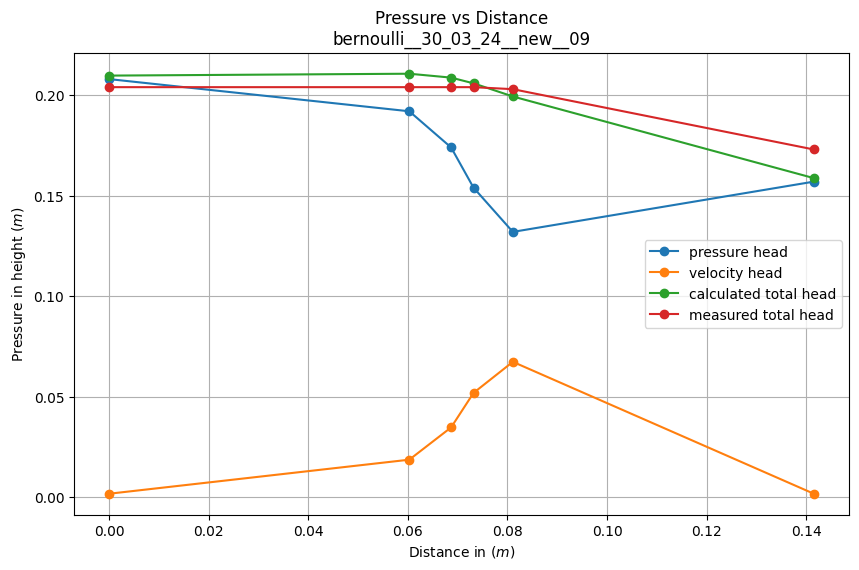

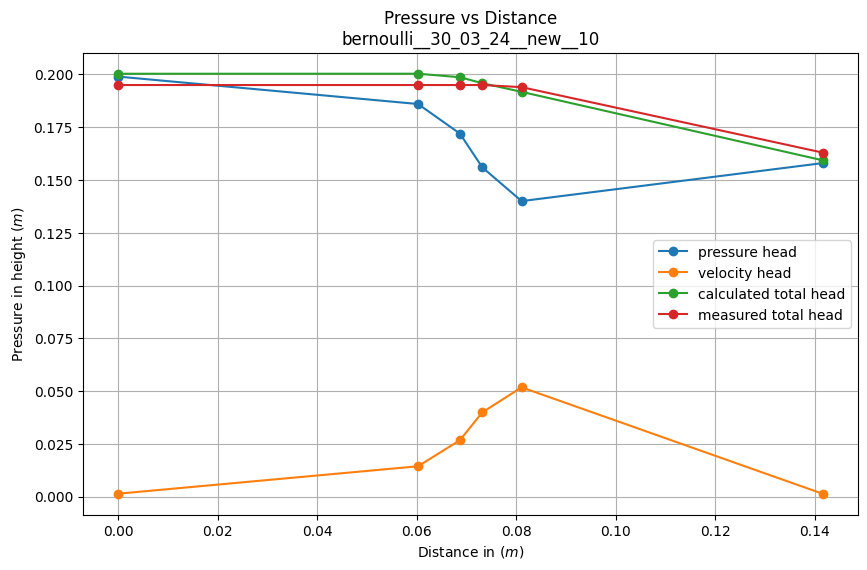

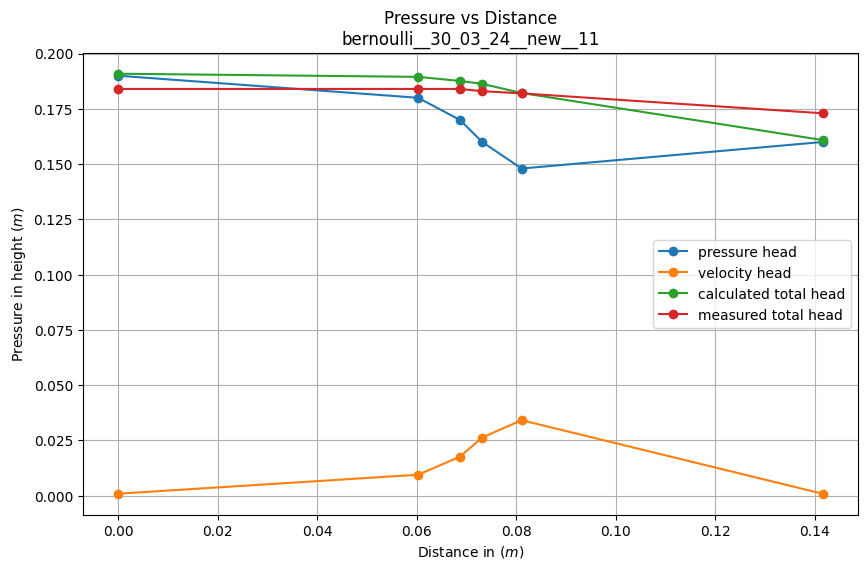

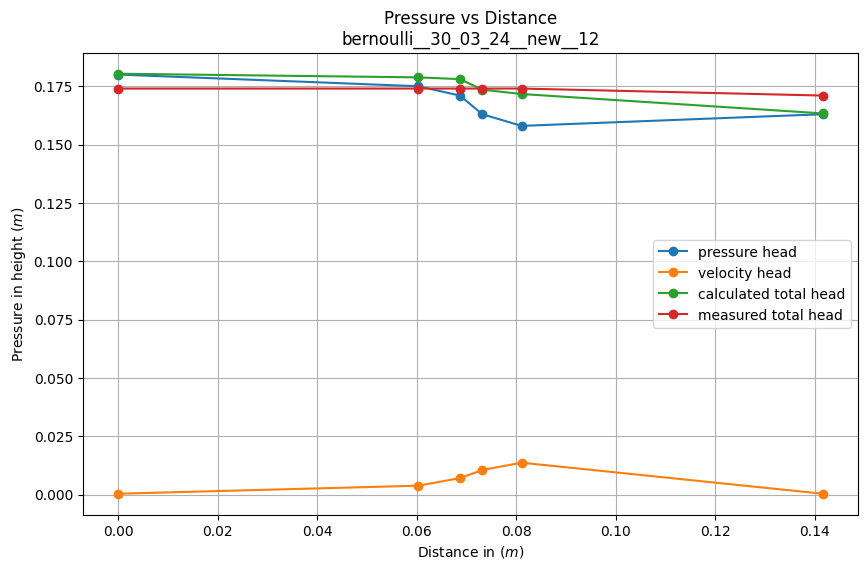

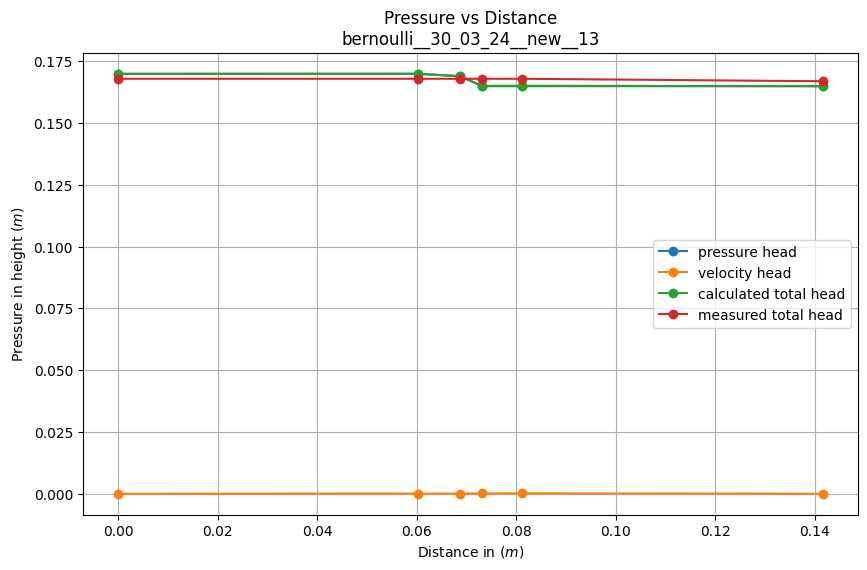

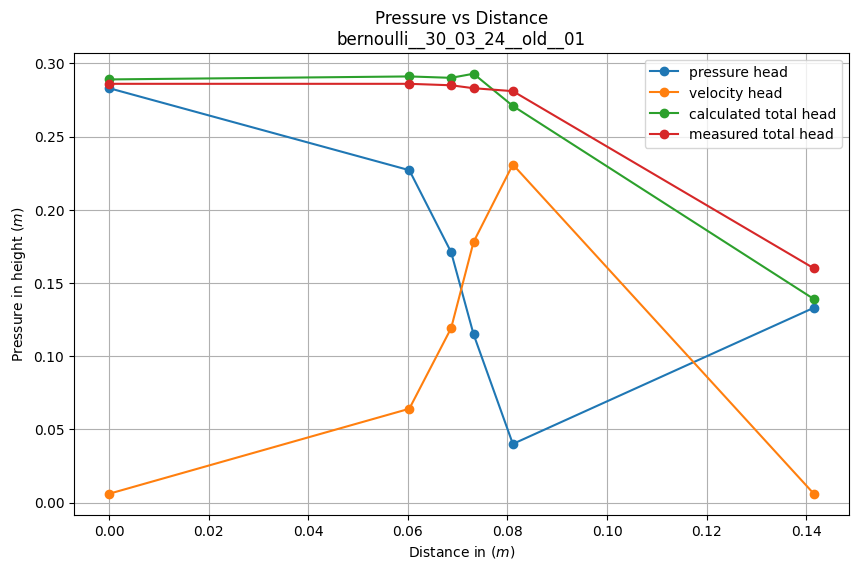

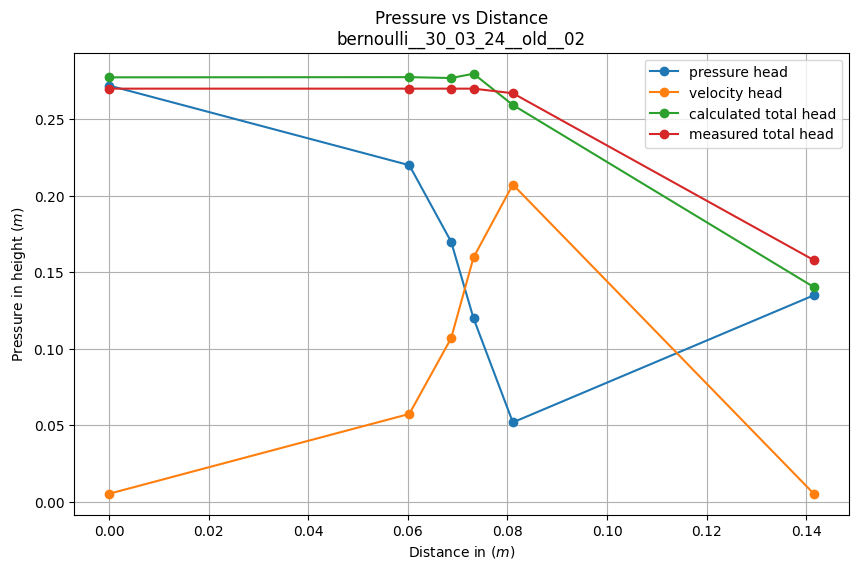

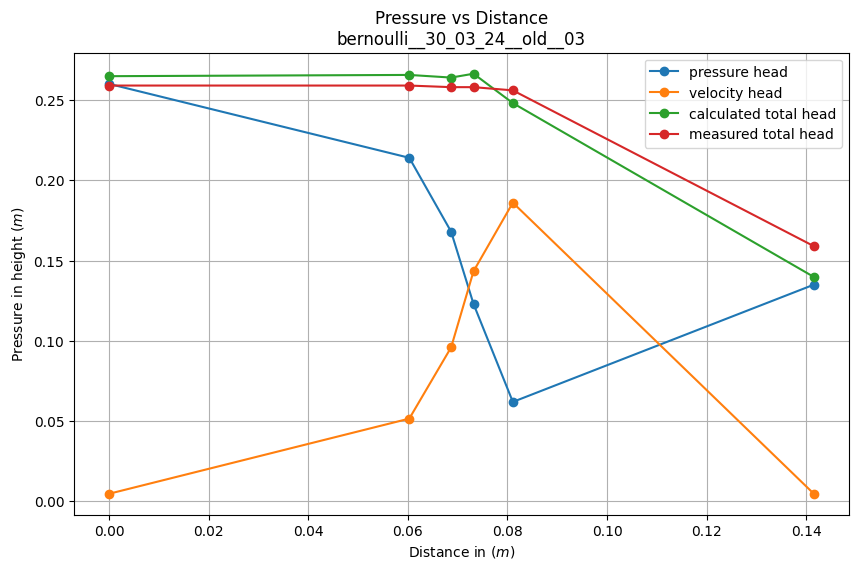

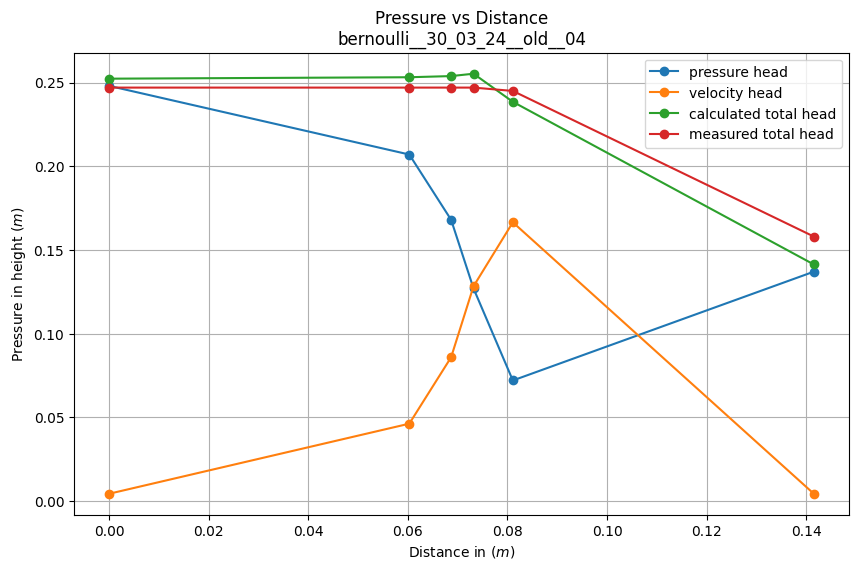

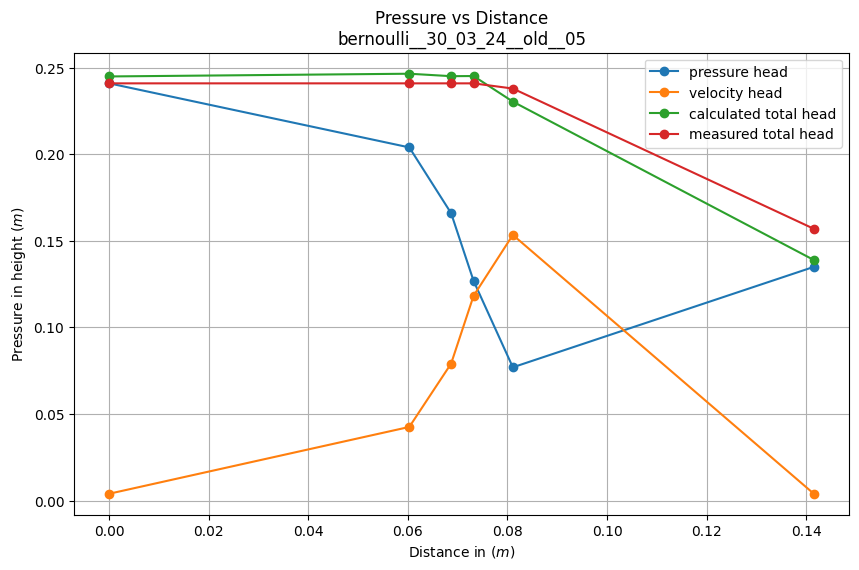

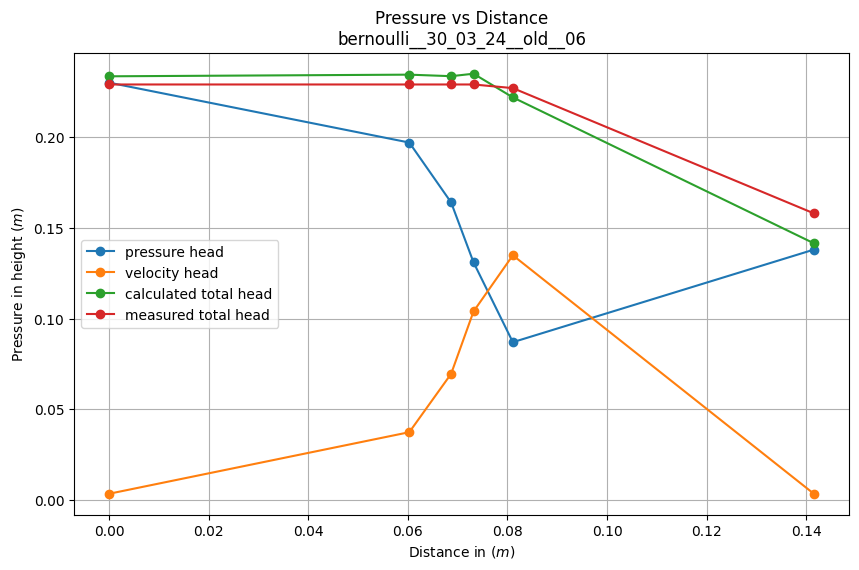

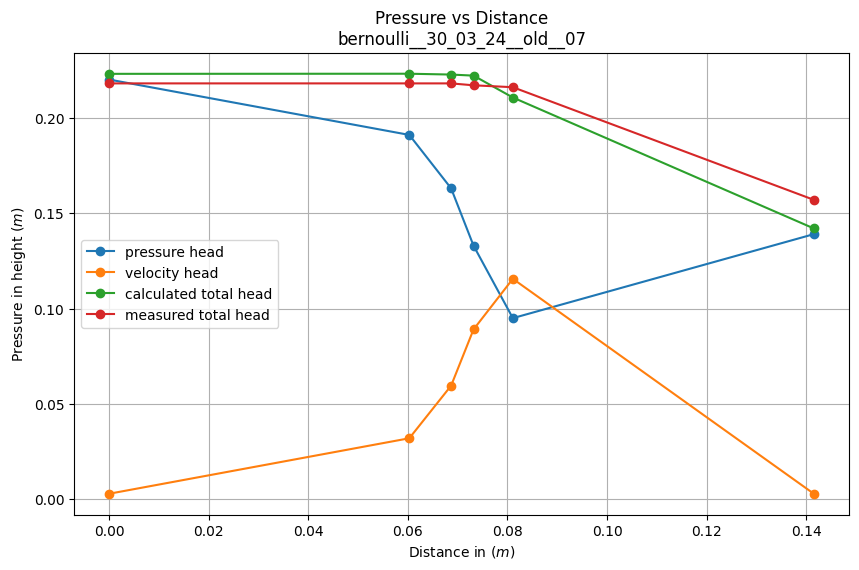

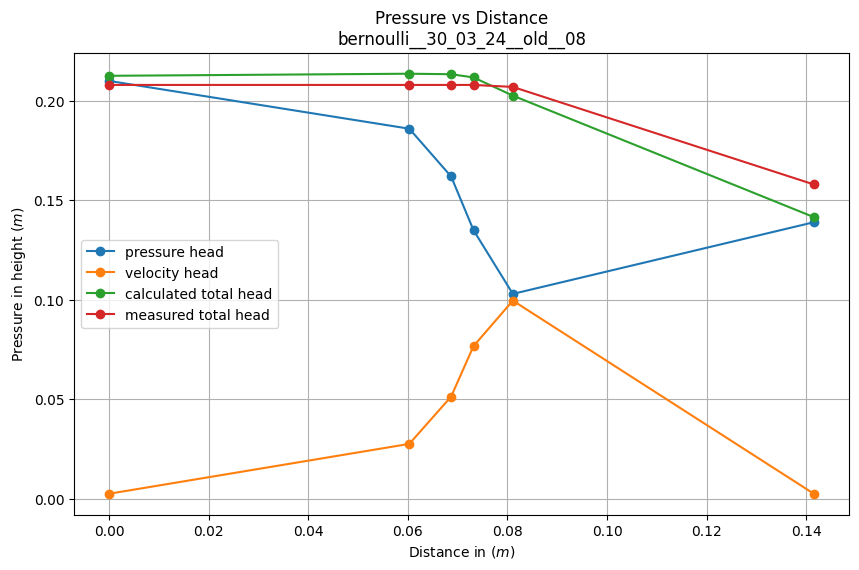

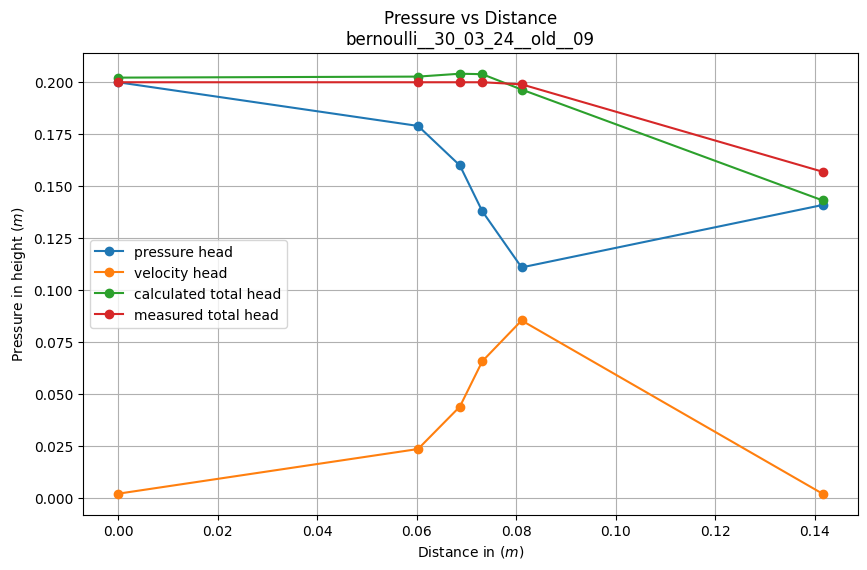

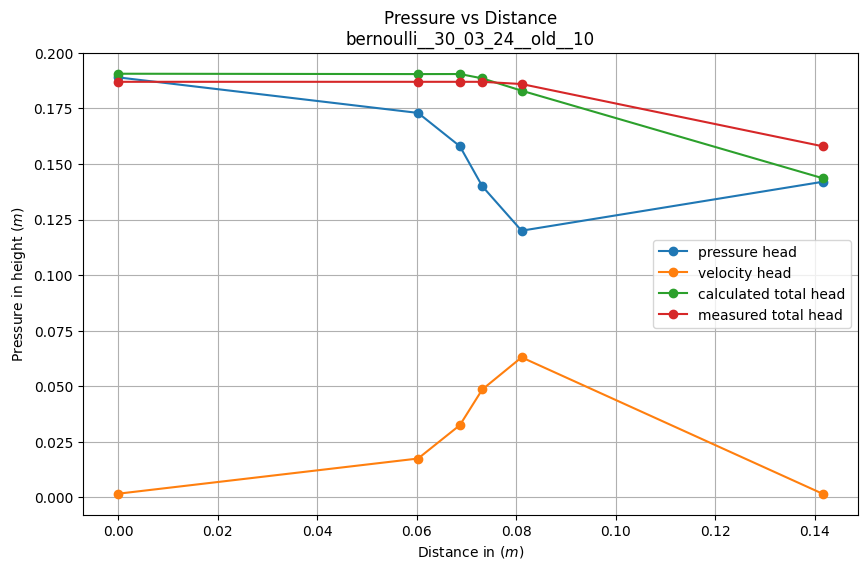

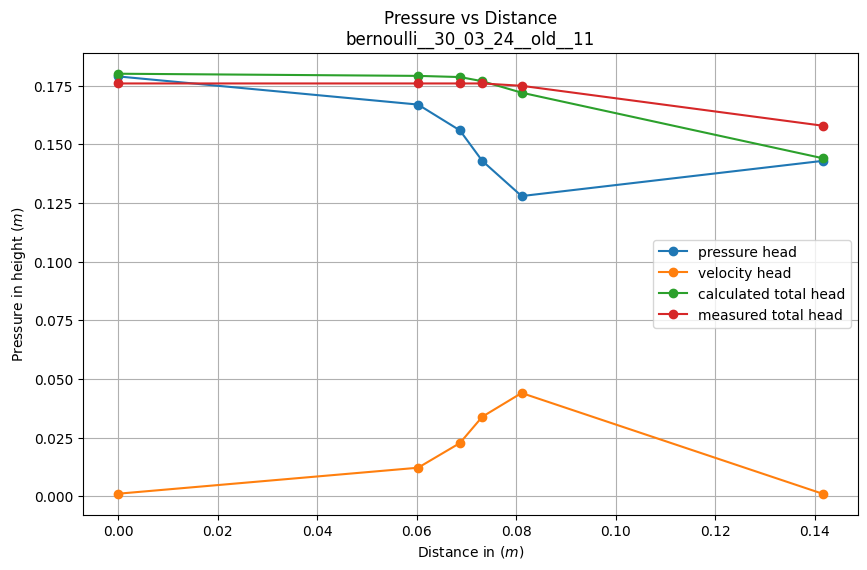

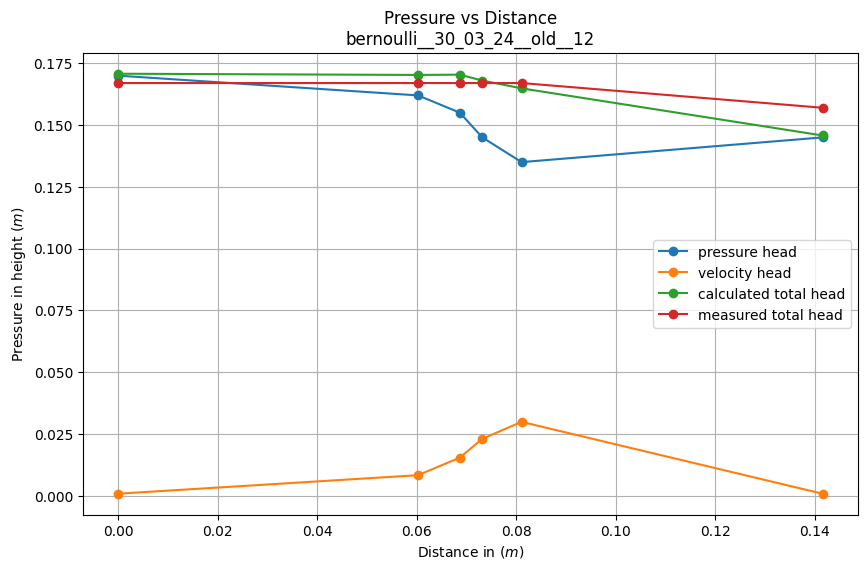

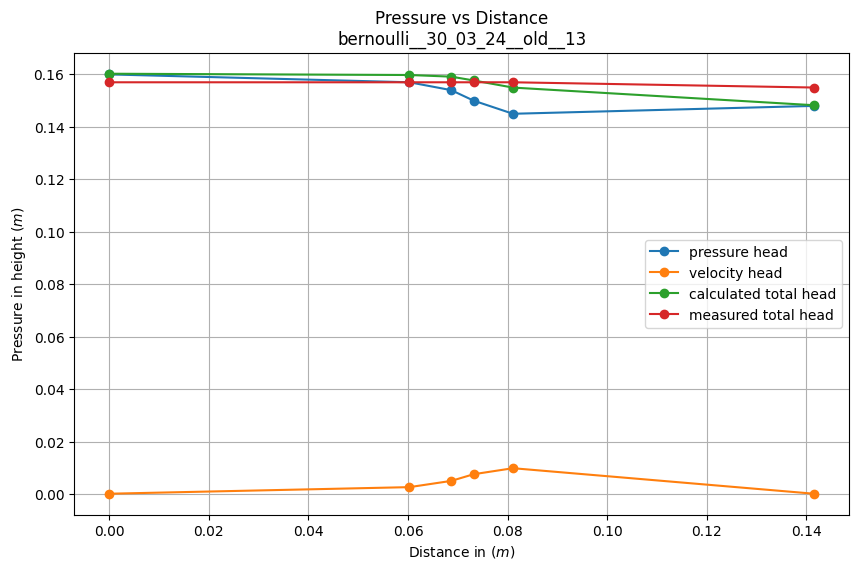

In [18]:
measurements.apply(func=lambda arg: calculations(arg.file_path, arg.file_name), axis=1)